In [1]:
import sys
sys.version

'3.8.10 (default, Nov 14 2022, 12:59:47) \n[GCC 9.4.0]'

In [2]:
import numpy as np
np.__version__

import matplotlib.pyplot as plt


## Simple Neuron
Neuron computes the product of inputs and weights and add the bias to it and returns the output

In [3]:
inputs = [1,2,3,2.5]
weights = [0.2,0.8,-0.5,1.0]
bias = 2

In [4]:
output = inputs[0]*weights[0] + inputs[1]*weights[1] + inputs[2]*weights[2]
output = output + bias
print(output)

2.3


In [5]:
inputs_array = np.array(inputs)
weights_vector = np.array(weights)
output_vector = np.dot(inputs_array,weights_vector.T) + bias
print(output_vector)

4.8


## Neuron Layer
A layer computes the product of corresponding inputs and weights and add the corresponding bias to it and returns the output containing an array of output values

In [6]:
inputs_array = np.array([1,2,3,2.5])

weights1_vector = np.array([0.2,0.8,-0.5,1.0])
weights2_vector = np.array([0.5,-0.91,0.26,-0.5])
weights3_vector = np.array([-0.26,-0.27,0.17,0.87])

bias1 = 2
bias2 = 3
bias3 = 0.5

output1 = np.dot(inputs_array,weights1_vector.T) + bias1
output2 = np.dot(inputs_array,weights2_vector.T) + bias2
output3 = np.dot(inputs_array,weights3_vector.T) + bias3

output = [output1,output2,output3]
print(output)

[4.8, 1.21, 2.385]


In [7]:
weights_vector = np.array([[0.2,0.8,-0.5,1.0],
                           [0.5,-0.91,0.26,-0.5],
                           [-0.26,-0.27,0.17,0.87]])
                          
bias_vector = [2,3,0.5]
output = np.dot(inputs_array,weights_vector.T) + bias_vector
print(output)

[4.8   1.21  2.385]


Changing the input to vector

In [8]:
inputs_vector = np.array([[1,2,3,2.5],[2.0,5.0,-1.0,2.0],[-1.5,2.7,3.3,-0.8]])

output_vector = np.dot(inputs_vector,weights_vector.T) + bias_vector
print(output_vector)

[[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]]


### Multiple Layers
The ouput of the previous layer is fed to the next layer

In [9]:
inputs = np.array([[1,2,3,2.5],
                        [2.0,5.0,-1.0,2.0],
                        [-1.5,2.7,3.3,-0.8]])

weights1 = np.array([[0.2,0.8,-0.5,1.0],
                           [0.5,-0.91,0.26,-0.5],
                           [-0.26,-0.27,0.17,0.87]])

bias1 = np.array([2,3,0.5])

weights2 = np.array([[0.1,-0.14,-0.5],
                           [-0.5,0.12,-0.33],
                           [-0.44,0.73,-0.13]])
bias2 = np.array([-1, 2, -0.5])

layer1_output = np.dot(inputs,weights1.T) + bias1

output = np.dot(layer1_output,weights2.T) + bias2
print(output)

[[-1.8819  -1.04185 -2.03875]
 [ 0.0434  -2.7332  -5.7633 ]
 [-1.01914  1.41254 -0.35655]]


#### Creating a Layer Class

In [10]:
class Dense_Layer:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.10 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1,n_neurons))
    def forward(self, inputs):
        self.output = np.dot(inputs,self.weights) + self.biases
    def update_weight(self, delta):
        self.weights = self.weights + delta
    def update_bias(self,delta):
        self.biases = self.biases + delta

Initialising layers

In [11]:
X = np.array([  
                [1,2,3,2.5],
                [2.0,5.0,-1.0,2.0],
                [-1.5,2.7,3.3,-0.8]
            ])
layer1 = Dense_Layer(4,5)
layer2 = Dense_Layer(5,2)

Layer1 forward prop using X as input

In [12]:
layer1.forward(X)
print(layer1.output)

[[-0.65320873  0.44074777 -0.10835749 -0.39257555 -0.32281466]
 [-0.20280916  0.63880108  0.17069935  0.24661364 -0.38771872]
 [-0.35687161  0.09033135  0.47356042 -0.11981899 -0.00995022]]


Layer2 forward prop using layer1.output as input

In [13]:
layer2.forward(layer1.output)
print(layer2.output)

[[ 0.10800191  0.0424368 ]
 [-0.0146592   0.13389267]
 [ 0.03951516  0.04888621]]


## Activation Functions
Once the output value is calculated the output is fed to an activation function.


### Sigmoid Activation Function
$y=\frac{1}{1 + e^{-x}}$
    

In [14]:
def sigmoid(x):
    output = 1.0 / (1.0 + np.exp(-x))
    return output

    

In [15]:
print(sigmoid(-100000))
print(sigmoid(-100))
print(sigmoid(0))
print(sigmoid(100))
print(sigmoid(100000))

0.0
3.7200759760208356e-44
0.5
1.0
1.0


/tmp/ipykernel_2867/3456598896.py:2: RuntimeWarning: overflow encountered in exp
  output = 1.0 / (1.0 + np.exp(-x))


### ReLu Activation Function
$y=max(0,x)$
    
    

In [16]:
def relu(x):
    return  max(0,x)

In [17]:
print(relu(-100000))
print(relu(-100))
print(relu(0))
print(relu(100))
print(relu(100000))


0
0
0
100
100000


#### Activation Class

In [18]:
class ReLU:
    def forward(self,inputs):
        self.output = np.maximum(0,inputs)

In [19]:
class Sigmoid:
    def forward(self,inputs):
        self.output = 1.0 / (1.0 + np.exp(-inputs))

#### Note
next cell is specific for fetching the data as


In [20]:
import nnfs
from nnfs.datasets import spiral_data
nnfs.init()

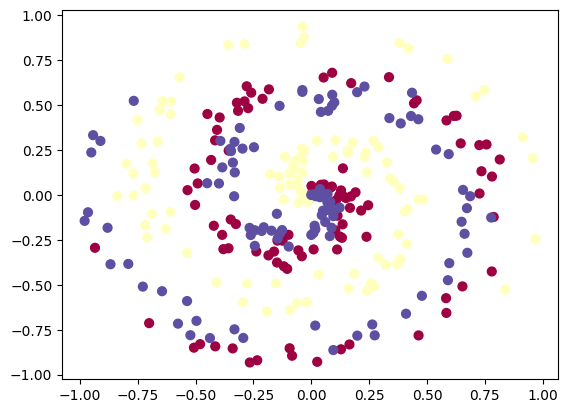

In [21]:
X, y = spiral_data(samples=100, classes=3)

plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()


In [22]:
layer1 = Dense_Layer(2,5)
activation1 = ReLU()

layer1.forward(X)
activation1.forward(layer1.output)

print('Layer 1:')
print(layer1.output)
print('Activation 1:')
print(activation1.output)



Layer 1:
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [-8.35815910e-04 -7.90404272e-04 -1.33452227e-03  4.65504505e-04
   4.56846210e-05]
 [-2.39994470e-03  5.93469958e-05 -2.24808278e-03  2.03573116e-04
   6.10024377e-04]
 ...
 [ 1.13291524e-01 -1.89262271e-01 -2.06855070e-02  8.11079666e-02
  -6.71350807e-02]
 [ 1.34588361e-01 -1.43197834e-01  3.09493970e-02  5.66337556e-02
  -6.29687458e-02]
 [ 1.07817926e-01 -2.00809643e-01 -3.37579325e-02  8.72561932e-02
  -6.81458861e-02]]
Activation 1:
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 4.65504505e-04
  4.56846210e-05]
 [0.00000000e+00 5.93469958e-05 0.00000000e+00 2.03573116e-04
  6.10024377e-04]
 ...
 [1.13291524e-01 0.00000000e+00 0.00000000e+00 8.11079666e-02
  0.00000000e+00]
 [1.34588361e-01 0.00000000e+00 3.09493970e-02 5.66337556e-02
  0.00000000e+00]
 [1.07817926e-01 0.00000000e+00 0.00000000e+00 8.7256193

## Softmax Activation
$S_{i,j} = \frac{e^{Z_{i,j}}}{\sum \limits_{l=1}^{L}e^{Z_{i,j}}}$

Note: while taking the exponent in the numerator, the largest value in vector is subtracted from all values so that the domain of exponential function is ($-\infty$,0) and range is (0,1) to remove the possibility of overflow when the we take exponential of large values

In [23]:
class Softmax:
    def forward(self,X):
        exponents = np.exp(X - np.max(X, axis = 1, keepdims=True))
        probs = exponents / np.sum(exponents, axis = 1, keepdims=True)
        self.output = probs

Implementing Forward Pass with following layers
3*4 Dense layer-> ReLU -> 3*3 Dense Layer -> Softmax

In [24]:
X, y = spiral_data(samples=100, classes=3)

dense1 = Dense_Layer(2,3)
activation1 = ReLU()
dense2 = Dense_Layer(3, 3)
activation2 = Softmax()

dense1.forward(X)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
activation2.forward(dense2.output)

print(activation2.output)

[[0.33333334 0.33333334 0.33333334]
 [0.33333507 0.33333328 0.3333316 ]
 [0.33327106 0.3333301  0.33339888]
 [0.33329675 0.33330458 0.33339873]
 [0.33331198 0.33331373 0.33337426]
 [0.33334184 0.33333313 0.33332503]
 [0.33334365 0.33333308 0.3333232 ]
 [0.3333453  0.33333308 0.33332166]
 [0.33334795 0.333333   0.33331898]
 [0.33335003 0.33333293 0.333317  ]
 [0.33335102 0.33333296 0.33331606]
 [0.33335316 0.3333329  0.333314  ]
 [0.3333543  0.33333287 0.33331287]
 [0.33335748 0.3333328  0.3333097 ]
 [0.33335924 0.33333275 0.333308  ]
 [0.3333594  0.33333275 0.33330783]
 [0.33335876 0.3333328  0.3333085 ]
 [0.33333334 0.33333334 0.33333334]
 [0.33336312 0.33333266 0.33330417]
 [0.33333904 0.3333332  0.33332774]
 [0.3333392  0.33333316 0.33332756]
 [0.3333669  0.33333257 0.3333005 ]
 [0.33333334 0.33333334 0.33333334]
 [0.3333648  0.33333263 0.33330256]
 [0.33337796 0.33333236 0.33328974]
 [0.33333334 0.33333334 0.33333334]
 [0.33336833 0.33333254 0.33329907]
 [0.33333334 0.33333334 0.33

## Loss Function

Once the neural network calculates the probability of each output, we calculate the loss function which essentially derives a value of how wrong or neural network is with our prediction($\hat{y}$) vs the actual output($y$)

In a cat/dog classifier, the prediction would be [0.4,0.6] means that there is a 40% chance it is a cat and 60% chance it is a cat. If the input is indeed a photo of dog, the correct output or target value will be [0,1] and we calculate the loss of each type of output(cat/dog)/ The loss can calculated be calculated in multiple ways

$L_{i}$: Sample Loss

i: i-th example

j: labal/output index (i.e, cat=0, dog=1 in a cat/dog classifier)

y: target value

$\hat{y}$: predicted value

#### Absolute Loss
$L_{i} = \sum_{j}\lvert {y_{i,j} - \hat{y_{i,j}} \rvert }$

#### Mean Squared Loss
$L_{i} = \sum_{j} \sqrt{(y_{i,j} - \hat{y_{i,j})^{2}} }$

#### Categorical Cross-Entropy
$L_{i} = -(\sum_{j}y_{i,j}log(\hat{y_{i,j}}) + (1-y_{i,j})log(1 - \hat{y_{i,j}}))$

The $y$ term and $(1-y)$ term exists because it handles the case of zero since $log(0)$ doesnt exist


In [25]:
class Loss:
    def calculate(self, output, y):
        loss_sample = self.forward(output, y)
        loss_batch = np.mean(loss_sample)
        return loss_batch

class CCE_Loss(Loss):
    def forward(self, y_pred, y_true):
        m = len(y_pred)
        y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7) # clipping done to eliminate zero error during log
        if len(y_true.shape) == 1:# case of output index as true value
            confidence = y_pred_clipped[range(m),y_true]
        elif len(y_true.shape) == 2:# case of using a one-hot vector as true value
            confidence = y_pred_clipped[np.sum(y_pred_clipped*y_true, axis = 1)]
        log_loss = -np.log(confidence)
        return log_loss

In [26]:
X, y = spiral_data(samples=100, classes=3)
print(X.shape)

y_one_hot = np.zeros((y.size, y.max() + 1))
y_one_hot[np.arange(y.size), y] = 1

dense1 = Dense_Layer(2,3)
activation1 = ReLU()
dense2 = Dense_Layer(3, 3)
activation2 = Softmax()

dense1.forward(X)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
activation2.forward(dense2.output)

loss_function = CCE_Loss()
loss = loss_function.calculate(activation2.output, y)
print(loss)

learning_rate = 0.01                   # learning rate
momentum = 0.9                         # momentum
w1_delta = np.zeros(dense1.weights.shape)         # Initializing updates with 0
b1_delta = np.zeros(dense1.biases.shape)
w2_delta = np.zeros(dense2.weights.shape)
b2_delta = np.zeros(dense2.biases.shape)
epochs = 1000


(300, 2)
1.0989271


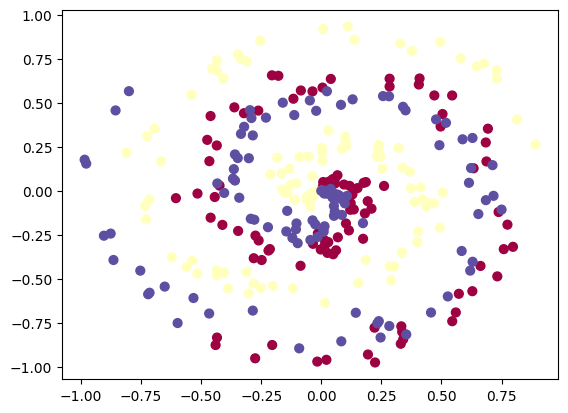

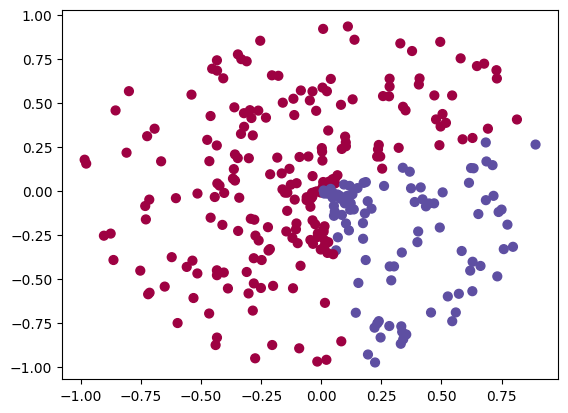

In [27]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

y_pred = np.argmax(activation2.output,axis = 1)
plt.scatter(X[:, 0], X[:, 1], c = y_pred, s=40, cmap=plt.cm.Spectral)
plt.show()

In [28]:
def cross_E_grad(y_true, y_pred):          
    return -y_true/(y_pred + 10**-100)

def softmax(x):           
    return np.exp(x) / np.sum(np.exp(x))

def softmax_dash(softmax):
    s = softmax.reshape(-1,1)
    return np.diagflat(s) - np.dot(s, s.T)

def relu_dash(x):
    return np.where(x > 0, 1, 0)



In [195]:
X, y = spiral_data(samples=100, classes=3)

y_one_hot = np.zeros((y.size, y.max() + 1))
y_one_hot[np.arange(y.size), y] = 1

dense1 = Dense_Layer(2,8)
activation1 = ReLU()
dense2 = Dense_Layer(8,64)
activation2 = ReLU()
dense3 = Dense_Layer(64, 3)
activation3 = Softmax()

dense1.forward(X)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
activation2.forward(dense2.output)
dense3.forward(activation2.output)
activation3.forward(dense3.output)


update_w1 = np.zeros(dense1.weights.shape)         # Initializing updates with 0
update_b1 = np.zeros(dense1.biases.shape)
update_w2 = np.zeros(dense2.weights.shape)
update_b2 = np.zeros(dense2.biases.shape)
update_w3 = np.zeros(dense3.weights.shape)
update_b3 = np.zeros(dense3.biases.shape)

learning_rate = 0.05           # learning rate
momentum = 0.99                       # momentum
epochs = 1000000
losses = []

for i in range(epochs):
    if i == 10000:
        learning_rate = 0.04
    if i == 10000:
        learning_rate = 0.02
    if i == 100000:
        learning_rate = 0.01
    if i == 200000:
        learning_rate = 0.005
    if i == 500000:
        learning_rate = 0.001
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)
    dense3.forward(activation2.output)
    activation3.forward(dense3.output)

    loss_function = CCE_Loss()
    
    y_pred = np.argmax(activation3.output,axis = 1)
    loss = loss_function.calculate(activation3.output, y)
    losses.append(loss)
    if i % 1000 == 0:
        print("Loss at epoch")
        print(i)
        print(loss)

    dz3 = activation3.output - y_one_hot
    dw3 = np.dot(activation2.output.T,dz3) / X.shape[0]
    db3 = np.sum(dz3,axis=0,keepdims=True) / X.shape[0]

    a = np.dot(dense3.weights,dz3.T)
    b = relu_dash(dense2.output)
    dz2 = a.T * b
    dw2 = np.dot(activation1.output.T,dz2) / X.shape[0]
    db2= np.sum(dz2,axis=0,keepdims=True)
    

    a = np.dot(dense2.weights,dz2.T)
    b = relu_dash(dense1.output)
    dz1 = a.T * b
    dw1 = np.dot(X.T,dz1) / X.shape[0]
    db1 = np.sum(dz1,axis=0,keepdims=True)

    update_w1 = -learning_rate * dw1 * (1-momentum) + momentum * update_w1
    update_b1 = -learning_rate * db1 * (1-momentum)  + momentum * update_b1
    update_w2 = -learning_rate * dw2 * (1-momentum) + momentum * update_w2
    update_b2 = -learning_rate * db2 * (1-momentum) + momentum * update_b2
    update_w3 = -learning_rate * dw3 * (1-momentum) + momentum * update_w3
    update_b3 = -learning_rate * db3 * (1-momentum) + momentum * update_b3

    dense3.update_bias(update_b3)
    dense3.update_weight(update_w3)
    dense2.update_bias(update_b2)
    dense2.update_weight(update_w2)
    dense1.update_bias(update_b1)
    dense1.update_weight(update_w1) 


Loss at epoch
0
1.0987765
Loss at epoch
1000
1.0740747
Loss at epoch
2000
1.0727444
Loss at epoch
3000
1.0721952
Loss at epoch
4000
1.0716463
Loss at epoch
5000
1.0709119
Loss at epoch
6000
1.0699701
Loss at epoch
7000
1.0687596
Loss at epoch
8000
1.0672051
Loss at epoch
9000
1.0649848
Loss at epoch
10000
1.0615977
Loss at epoch
11000
1.0593286
Loss at epoch
12000
1.0568372
Loss at epoch
13000
1.0537136
Loss at epoch
14000
1.0497996
Loss at epoch
15000
1.043542
Loss at epoch
16000
1.0352607
Loss at epoch
17000
1.0247092
Loss at epoch
18000
1.013689
Loss at epoch
19000
1.0023627
Loss at epoch
20000
0.99011177
Loss at epoch
21000
0.9704182
Loss at epoch
22000
0.94685555
Loss at epoch
23000
0.91647595
Loss at epoch
24000
0.87684125
Loss at epoch
25000
0.83211833
Loss at epoch
26000
0.78977436
Loss at epoch
27000
0.7555627
Loss at epoch
28000
0.72916293
Loss at epoch
29000
0.7076221
Loss at epoch
30000
0.6899508
Loss at epoch
31000
0.674593
Loss at epoch
32000
0.6605118
Loss at epoch
33000

KeyboardInterrupt: 

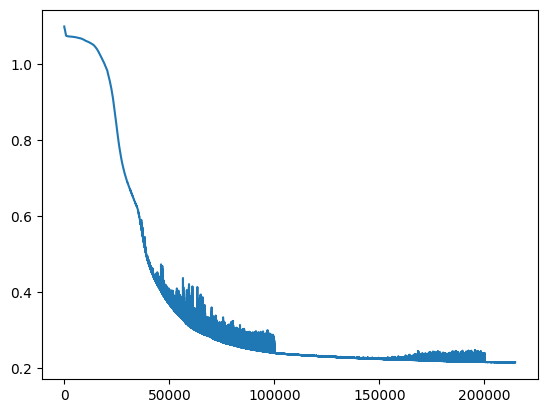

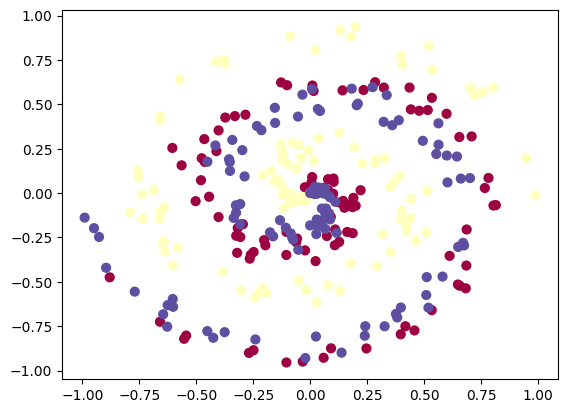

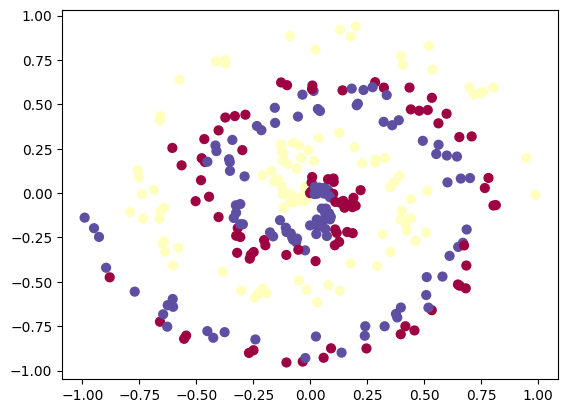

Accuracy: 90.33333333333333


In [197]:
plt.plot(losses)
plt.show()

plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()


y_pred = np.argmax(activation3.output,axis = 1)
plt.scatter(X[:, 0], X[:, 1], c = y_pred, s=40, cmap=plt.cm.Spectral)
plt.show()
accuracy = np.mean(y_pred == y)
print('Accuracy: ' + str(accuracy * 100))


In [196]:
ActivationTrue = activation3.output
activation3.output = ActivationTrue

In [178]:
X_new, y_new = spiral_data(samples=100, classes=3)

y_one_hot_new = np.zeros((y_new.size, y_new.max() + 1))
y_one_hot_new[np.arange(y_new.size), y_new] = 1

dense1_new = Dense_Layer(2,16)
activation1_new = ReLU()
dense2_new = Dense_Layer(16,64)
activation2_new = ReLU()
dense3_new = Dense_Layer(64, 3)
activation3_new = Softmax()

dense1_new.forward(X)
activation1_new.forward(dense1.output)
dense2_new.forward(activation1.output)
activation2_new.forward(dense2.output)
dense3_new.forward(activation2.output)
activation3_new.forward(dense3.output)


update_w1_new = np.zeros(dense1.weights.shape)         # Initializing updates with 0
update_b1_new = np.zeros(dense1.biases.shape)
update_w2_new = np.zeros(dense2.weights.shape)
update_b2_new = np.zeros(dense2.biases.shape)
update_w3_new = np.zeros(dense3.weights.shape)
update_b3_new = np.zeros(dense3.biases.shape)

learning_rate_new = 0.01           # learning rate
momentum_new = 0.99                      # momentum
epochs_new = 100000
losses_new = []
i=0

for i_new in range(epochs_new):
    # if i_new == 20000:
    #     learning_rate = 0.03
    # if i_new == 50000:
    #     learning_rate = 0.01
    dense1_new.forward(X_new)
    activation1_new.forward(dense1_new.output)
    dense2_new.forward(activation1_new.output)
    activation2_new.forward(dense2_new.output)
    dense3_new.forward(activation2_new.output)
    activation3_new.forward(dense3_new.output)

    loss_function_new = CCE_Loss()
    
    y_pred_new = np.argmax(activation3_new.output,axis = 1)
    loss_new = loss_function_new.calculate(activation3_new.output, y_new)
    losses_new.append(loss_new)
    if i_new % 1000 == 0:
        print("Loss at epoch " + str(i_new))
        print(loss_new)

    dz3_new = activation3_new.output - y_one_hot_new
    dw3_new = np.dot(activation2_new.output.T,dz3) / X_new.shape[0]
    db3_new = np.sum(dz3_new,axis=0,keepdims=True) / X_new.shape[0]

    a_new = np.dot(dense3_new.weights,dz3_new.T)
    b_new = relu_dash(dense2_new.output)
    dz2_new = a_new.T * b_new
    dw2_new = np.dot(activation1_new.output.T,dz2) / X_new.shape[0]
    db2_new= np.sum(dz2_new,axis=0,keepdims=True)
    

    a_new = np.dot(dense2_new.weights,dz2_new.T)
    b_new = relu_dash(dense1_new.output)
    dz1_new = a_new.T * b_new
    dw1_new = np.dot(X_new.T,dz1_new) / X_new.shape[0]
    db1_new = np.sum(dz1_new,axis=0,keepdims=True)

    update_w1_new = -learning_rate_new * dw1_new * (1-momentum_new) + momentum_new * update_w1_new
    update_b1_new = -learning_rate_new * db1_new * (1-momentum_new) + momentum_new * update_b1_new
    update_w2_new = -learning_rate_new * dw2_new * (1-momentum_new) + momentum_new * update_w2_new
    update_w3_new = -learning_rate_new * dw3_new * (1-momentum_new) + momentum_new * update_w3_new
    update_b3_new = -learning_rate_new * db3_new * (1-momentum_new) + momentum_new * update_b3_new
    update_b2_new = -learning_rate_new * db2_new * (1-momentum_new) + momentum_new * update_b2_new

    dense3_new.update_bias(update_b3_new)
    dense3_new.update_weight(update_w3_new)
    dense2_new.update_bias(update_b2_new)
    dense2_new.update_weight(update_w2_new)
    dense1_new.update_bias(update_b1_new)
    dense1_new.update_weight(update_w1_new) 

ValueError: shapes (300,8) and (16,64) not aligned: 8 (dim 1) != 16 (dim 0)

In [ ]:
plt.plot(losses_new)
plt.show()

plt.scatter(X_new[:, 0], X_new[:, 1], c=y_new, s=40, cmap=plt.cm.Spectral)
plt.show()

y_pred_new = np.argmax(activation3_new.output,axis = 1)
plt.scatter(X_new[:, 0], X_new[:, 1], c = y_pred_new, s=40, cmap=plt.cm.Spectral)
plt.show()
accuracy = np.mean(y_pred_new == y_new)

In [ ]:
import tensorflow as tf
import keras.layers as kl
import matplotlib.pyplot as plt
from keras.models import Model
from keras.utils import plot_model

from keras.models import Sequential

from keras.layers import Dense

from keras.utils import to_categorical 



: 

In [ ]:
X, y = spiral_data(samples=100, classes=3)

model = Sequential()

model.add(Dense(2, activation='relu', input_dim=2))

model.add(Dense(3, activation='relu'))

model.add(Dense(3, activation='relu'))

model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', 

              loss='categorical_crossentropy', 

              metrics=['accuracy'])

model.fit(X, y, epochs=200)

print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))
model.summary()
plot_model(model)

: 

In [ ]:
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))
model.summary()
plot_model(model)


: 

In [ ]:
print(preds)

: 

: 